In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [63]:
pedest_df = pd.read_csv("pedestrian_data.csv")
shark_df = pd.read_csv("attack_year_area.csv")

In [9]:
pedest_df.head()

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,REGION
0,10232359,121.460072,-30.758825,2020,1615.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,1,Northern
1,10232904,115.714737,-33.321952,2020,1835.0,Intersection,PDO Major,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Southern
2,10233140,115.772579,-31.734973,2020,100.0,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Metro
3,10226903,115.961555,-31.861525,2020,856.0,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Metro
4,10227223,116.007399,-32.075582,2020,630.0,Midblock,PDO Minor,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Metro


In [5]:
shark_df

,Year,Metro,Northern,Southern
0,2016.0,3.0,2.0,3.0
1,2017.0,2.0,2.0,4.0
2,2018.0,5.0,2.0,6.0
3,2019.0,2.0,1.0,0.0
4,2020.0,1.0,3.0,4.0


In [70]:
# add totals column
shark_df["Total"] = ""
shark_df["Total"] = shark_df["Metro"] + shark_df["Northern"] + shark_df["Southern"]
shark_df

,Year,Metro,Northern,Southern,Total
0,2016.0,3.0,2.0,3.0,8.0
1,2017.0,2.0,2.0,4.0,8.0
2,2018.0,5.0,2.0,6.0,13.0
3,2019.0,2.0,1.0,0.0,3.0
4,2020.0,1.0,3.0,4.0,8.0


In [41]:
region = pedest_df.groupby(['CRASH_DATE','REGION'])['TOTAL_PEDESTRIANS_INVOLVED'].count()
region

CRASH_DATE  REGION  
2016        Metro       382
            Northern     37
            Southern     33
2017        Metro       427
            Northern     51
            Southern     28
2018        Metro       396
            Northern     34
            Southern     28
2019        Metro       387
            Northern     39
            Southern     26
2020        Metro       325
            Northern     34
            Southern     32
Name: TOTAL_PEDESTRIANS_INVOLVED, dtype: int64

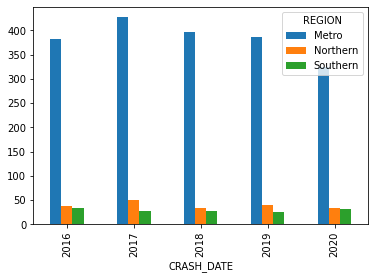

In [12]:
# check bar chart
region.unstack().plot(kind='bar')

In [17]:
# create df and save
region_year_area = region.unstack()
region_year_area =region_year_area.fillna(0)
region_year_area
region_year_area.to_csv("accident_year_area.csv")

In [33]:
# accident_df = pd.read_csv("accident_year_area.csv")
# # accident_df

# # add totals
# accident_df["Total"] = ""
# accident_df["Total"] = accident_df["Metro"] + accident_df["Northern"] + accident_df["Southern"]
# accident_df

,CRASH_DATE,Metro,Northern,Southern,Total
0,2016,382,37,33,452
1,2017,427,51,28,506
2,2018,396,34,28,458
3,2019,387,39,26,452
4,2020,325,34,32,391


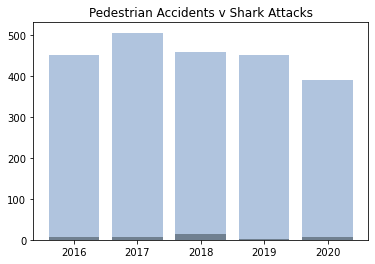

In [93]:
plt.bar(accident_df["CRASH_DATE"], accident_df["Total"], label="Accidents", color="lightsteelblue")
plt.bar(shark_df["Year"], shark_df["Total"], label="Shark Attacks", color="slategray")
plt.title("Pedestrian Accidents v Shark Attacks")
plt.savefig("Ped v shark attacks per year.png")
plt.show()

In [88]:
# estimated WA pedestrian and ocean usage
wa_pedestrian_year = 886000000
wa_ocean_year = 2180000
accidents_year = accident_df["Total"].sum()/5
shark_attacks_year = shark_df["Total"].sum()/5
ratio_acc = round(1/(accidents_year/wa_pedestrian_year)-1)
ratio_att = round(1/(shark_attacks_year/wa_ocean_year)-1)

print(f"The ratio of a person getting hit by a car each year is 1 in {ratio_acc:,.0f}")
print(f"The ratio of a person getting attacked by a shark each year is 1 in {ratio_att:,.0f}")

The ratio of a person getting hit by a car each year is 1 in 1,961,044
The ratio of a person getting attacked by a shark each year is 1 in 272,499
